In [9]:
# <!-- collapse=True -->
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Intervalle de confiance

La valeur exacte d'une mesure statistique n'est pas connue de façon absolue, mais avec une certaine probabilité dans un intervalle de confiance. Cet intervalle de confiance dépend de la distribution statistiques de la valeur mesurée, en particulier de l'écart-type. La distribution et l'écart-type peut être connus, 

* Population avec une certain loi de distribution
* Effectue une estimation de la **moyenne** à partir d'un échantillon de $N$ mesures,
    Quel est l'intervalle de confiance sur cette estimation ?

C'est-à-dire dans quelle intervalle autour de l'estimaton de la moyenne $m_N$, la moyenne réel ($\mu$) à $P$% chances de se trouver. $P$ étant généralement fixé à 95% ou 99%.
$$
µ \in [m_N-I, \, m_N+I] \; pour \; P\% \; des \; N\!-\!échantillons 
$$

I est donc une fonction de $N$ et de $P$. Il est aussi une fonction de la distribution des valeurs dans la population, en particulier de l'écart-type de ces valeurs.

On peut considérer deux cas standard:
    - 1er cas: la distribution est normale et d'écart-type connu:  $\sigma_0$
    - 2nd cas: la distribution est normale, mais d'écart-type inconnu. 

## Avec une gausienne d'écart-type connu

* L'estimateur de la moyenne suit une loi normale d'écart-type: $\tilde \sigma = \sigma_0/\sqrt n$

* L'intégrale de la loi normée et centrée entre les bornes $\pm I$ donne la probabilité $P$:

$$
P = \int _{-I} ^{+I} \!  G_{\tilde \sigma} \left( x \right)dx   
= \int _{-t} ^{+t} \!  G_1 \left( u \right)du
$$

avec $I = \frac{\sigma_0}{\sqrt N} \cdot t$.


On obtient la solution de cette intégralle avec la fonction erreur (_erf_). On peut aussi utiliser les fonctions statistiques de `scipy` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)):
$$
P = 1 - 2\,CDF( -t )
$$
$$
 I= PPF[ \, (1-P)/2 \, ]
$$

In [10]:
from scipy.stats import norm

In [20]:
P = .90
t = -norm.ppf( (1-P)/2 , loc=0, scale=1 )
print( t )

1.64485362695


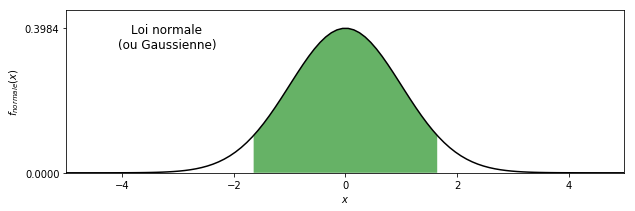

In [21]:
# <!-- collapse=True -->

x = np.linspace(-5, 5, 100)
x_I = np.linspace( -t, t, 60 )
plt.figure(figsize=(10, 3) )
plt.plot(x, norm.pdf(x) , 'k-' , alpha=1);

plt.fill_between(x_I, norm.pdf(x_I)  , alpha=0.6, facecolor='green');
plt.ylim([0, .45]); plt.xlim([-5, 5]);
plt.yticks([0, np.max(norm.pdf(x)) ]);
plt.xlabel('$x$'); plt.ylabel('$f_{normale}(x)$');
plt.title("Loi normale\n(ou Gaussienne)", x=0.18, y=0.73);

_Remarque:_ On retrouve la règle des 3 sigmas, correspondant à environ $P \approx 99.74 \%$

On peut illustrer l'intervalle de confiance en traçant la moyenne glissante sur une serie aléatoire centrée. On peut alors observer quand la moyenne réelle (0) n'est pas dans l'intervalle de confiance.

In [124]:
def moyenneGlissante( X, n):
    m = [ np.mean( X[i:i+n] ) for i in range( len(X)-n ) ]
    return np.array( m )

In [143]:
X = norm.rvs( loc=0, scale=1, size=600 )

N = 20
m = moyenneGlissante( X, N)

P = .80
t = -norm.ppf( (1-P)/2 , loc=0, scale=1 )   
IC = 1./np.sqrt( N )*t

notzero = np.where( np.logical_or( m+IC<0 , m-IC>0 )  )[0]

print( 1-len(notzero)/len(m) )

0.6724137931034483


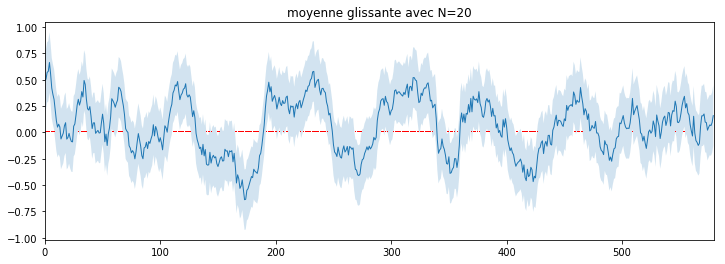

In [144]:
plt.figure( figsize=(12, 4) );
plt.plot( m, '-', linewidth=1)

plt.fill_between( range(len(m)), m-IC, m+IC,  alpha = .2 );
plt.plot( notzero, notzero*0, ',r');
plt.xlim([0, len(m)]); plt.title('moyenne glissante avec N=%i'%N);

Dans ce cas l'écart-type des mesures est connu. En pratique, ce n'est pas forcement les cas. L'écart-type doit alors être lui aussi estimé à partir des mesures. L'incertitude sur l'écart-type s'ajoute donc à l'erreur sur l'estimation de la moyenne. 

## écart-type inconnu

cf. loi de Student: https://fr.wikipedia.org/wiki/Loi_de_Student

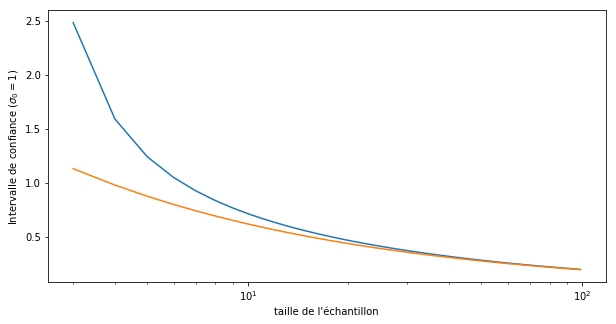

In [49]:
from scipy.stats import t as student
n_span = np.array( range(3, 100) )
alpha = .05
t_student =  student.ppf( 1-.5*alpha, n_span-1 )

P = 1-alpha
t_norm = -norm.ppf( (1-P)/2 , loc=0, scale=1 )   

plt.figure( figsize=(10, 5));
plt.semilogx( n_span, t_student/np.sqrt( n_span ) );
plt.semilogx( n_span, t_norm*np.ones( np.size(n_span) )/np.sqrt( n_span ) );
plt.xlabel("taille de l'échantillon");
plt.ylabel(u"Intervalle de confiance ($\sigma_0=1$)");

In [25]:
def ecarttypeGlissant( X, n):
    s = [ np.std( X[i:i+n] ) for i in range( len(X)-n ) ]
    return np.array( s )

from scipy.stats import t as student
def intervalle_confiance( X, alpha = .05 ):
    n = len( X )
    IC =  student.ppf( 1-.5*alpha, n-1 ) * np.sqrt( np.var( X ) / n )
    return IC

In [146]:
X = norm.rvs( loc=0, scale=1, size=600 )
X[300:] *= 3

N = 20
m, s = moyenneGlissante( X, N), ecarttypeGlissant(X, N)

P = .80
alpha = 1-P
t = student.ppf(  1-.5*alpha, N-1 )   
IC = s/np.sqrt( N )*t

notzero = np.where( np.logical_or( m+IC<0 , m-IC>0 )  )[0]

print( 1-len(notzero)/len(m) )

0.6982758620689655


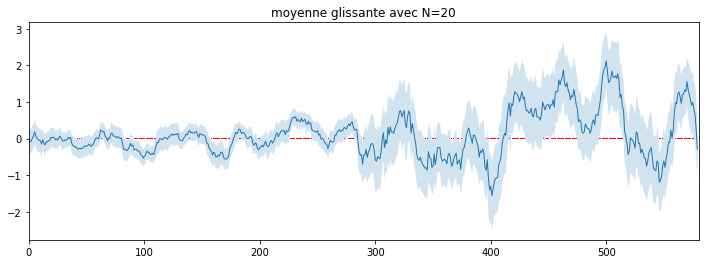

In [147]:
plt.figure( figsize=(12, 4) );
plt.plot( m, '-', linewidth=1)

plt.fill_between( range(len(m)), m-IC, m+IC,  alpha = .2 );
plt.plot( notzero, notzero*0, ',r');
plt.xlim([0, len(m)]); plt.title('moyenne glissante avec N=%i'%N);

L'intervalle de confiance s'ajuste en fonction de l'écart-type estimé.